<a href="https://colab.research.google.com/github/MPoblocka/Data-science/blob/main/LEGO_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This google colaboratory sheet presents LEGO data analysis. 


**Data Source**

The .csv data files were obtained from https://rebrickable.com/download/. 
The data includes information about:
- colors used for the design of LEGO elements, 
- number of elements used within each LEGO set, 
- number of sets produced from 1949 till 2022, 
- types and number of LEGO themes over the years,
- figures types.



<img src="https://cdn.pixabay.com/photo/2018/05/10/17/48/lego-3388163_960_720.png">

## **Importing pandas and matplotlib**

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

## **Data Exploration**

##**Question**: How many different colours does the LEGO company produce? 

In [99]:
df= pd.read_csv("Data/colors.csv")

**.nunique** function is used to check how many unique elements is within each column. The rgb columns, which represents the unique id for each colour will be used to answer the question. 
**LEGO produces 189 colours**

In [100]:
df.nunique(axis=0)

id          217
name        217
rgb         189
is_trans      2
dtype: int64

Going further with the analysis we can identify the number of transparent colours. For this reason, the groupby() was used to grouped data based on 'is_trans' values. 
**The answer is:** There are 38 transparent colours.

In [101]:
df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,179,179,179
t,38,38,38


##**Question**: In which year were the first LEGO sets released and what were these sets called?

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

In [102]:
sets = pd.read_csv("Data/sets.csv")

In [103]:
sets.isna()
sets.sort_values("year",ascending=True)

,set_num,name,year,theme_id,num_parts
11843,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
11861,700.3-1,Medium Gift Set (ABB),1949,365,142
11856,700.2-1,Large Gift Set (ABB),1949,365,178
11867,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
11866,700.A-1,Small Brick Set (ABB),1949,371,24
...,...,...,...,...,...
18321,9788325338886-1,City. Kolorowanka z naklejkami,2022,497,0
864,11025-1,Blue Baseplate,2022,621,1
18323,9788325339142-1,Jurassic World: Time to Play!,2022,497,3
383,10306-1,Atari 2600,2022,721,0


In [104]:
sets[sets['year']==1949]



,set_num,name,year,theme_id,num_parts
11843,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
11856,700.2-1,Large Gift Set (ABB),1949,365,178
11861,700.3-1,Medium Gift Set (ABB),1949,365,142
11866,700.A-1,Small Brick Set (ABB),1949,371,24
11867,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Answer:**The first LEGO was released in 1949.

##**Question**: What are the top 5 LEGO sets with the most number of parts. 

In [105]:
sets.sort_values('num_parts',ascending=False).head()

,set_num,name,year,theme_id,num_parts
4025,31203-1,World Map,2021,709,11695
18541,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
369,10294-1,Titanic,2021,721,9092
350,10276-1,Colosseum,2020,721,9036
13691,75192-1,Millennium Falcon,2017,171,7541


**Answer:** The World Map released in 2021 has the highest number of elements.
<img src="https://www.lego.com/cdn/cs/set/assets/blt6e4605758d75ce41/31203.jpg?fit=bounds&format=jpg&quality=80&width=1500&height=1500&dpr=1" >

##**Question**: In which year LEGO produced the highest number of sets?

**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].tail()

year
2018     881
2019     946
2020     942
2021    1097
2022     658
Name: set_num, dtype: int64

The data does not include the whole year 2022, therefore this year will excluded from the graph

<BarContainer object of 71 artists>

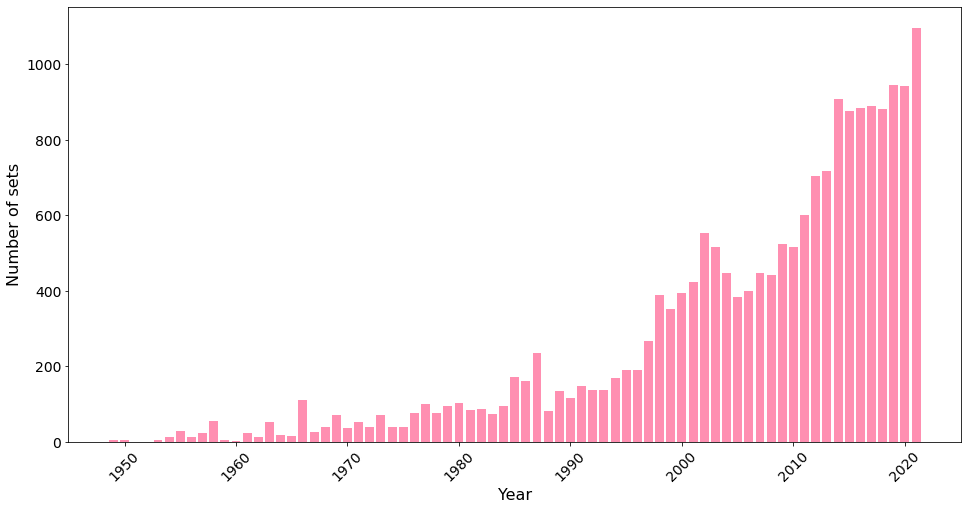

In [108]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of sets',fontsize=16)
plt.bar(sets_by_year.index[:-1] ,sets_by_year.set_num[:-1], color='#FF8FB1')
         

**Answer:**
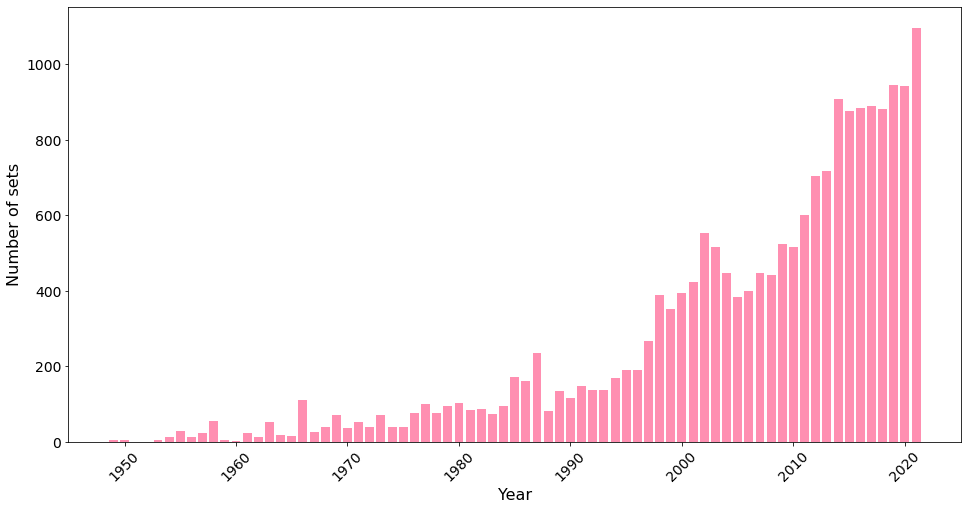

##**Question**: What is the number of different themes shipped by year? 

In [109]:
sets.sort_values("theme_id",ascending=True)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
6475,42138-1,Ford Mustang Shelby GT500,2022,1,544
6476,42139-1,All-Terrain Vehicle,2022,1,764
6477,42140-1,App-Controlled Transformation Vehicle,2022,1,772
6479,42141-1,McLaren Formula 1 Team 2022 (First Edition),2022,1,1432
...,...,...,...,...,...
13892,75571-1,Neytiri & Thanator vs. AMP Suit Quaritch,2022,724,0
13893,75572-1,Jake & Neytiri’s First Banshee Flight,2022,724,0
13894,75573-1,Floating Mountains: Site 26 & RDA Samson,2022,724,0
13895,75574-1,Toruk Makto & Tree of Souls,2022,724,0


In [110]:
themes_by_year = sets.groupby('year').agg({'theme_id':pd.Series.nunique})
themes_by_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2018,89
2019,77
2020,85


In [111]:
themes_by_year.rename(columns = {'theme_id': 'nr_themes'},inplace= True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


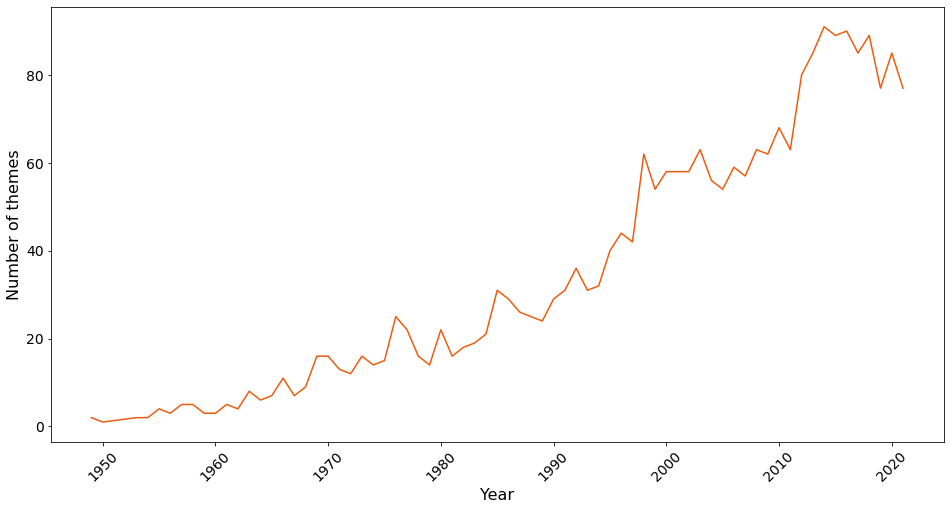

In [112]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of themes',fontsize=16)
plt.plot(themes_by_year.index[:-1], themes_by_year['nr_themes'][:-1], color="#EF5B0C")

**Answer:**
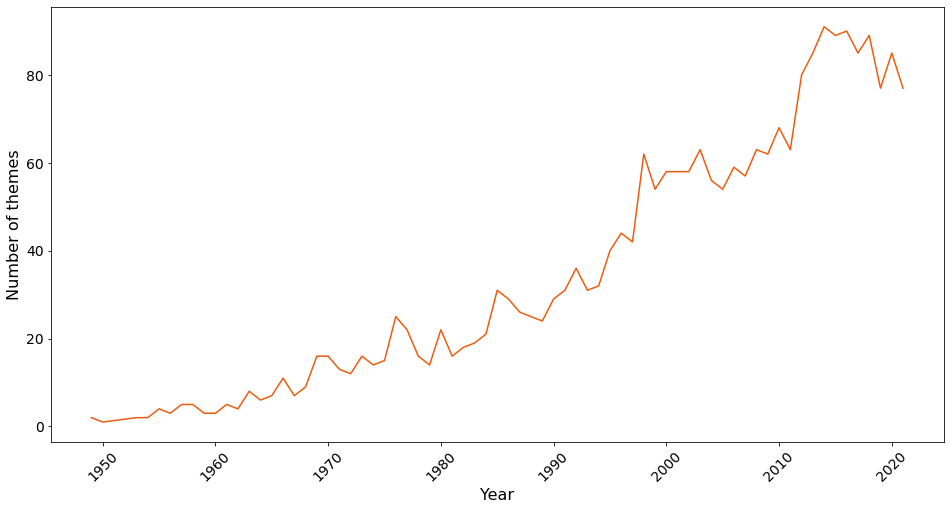

Text(0, 0.5, 'Number of Themes')

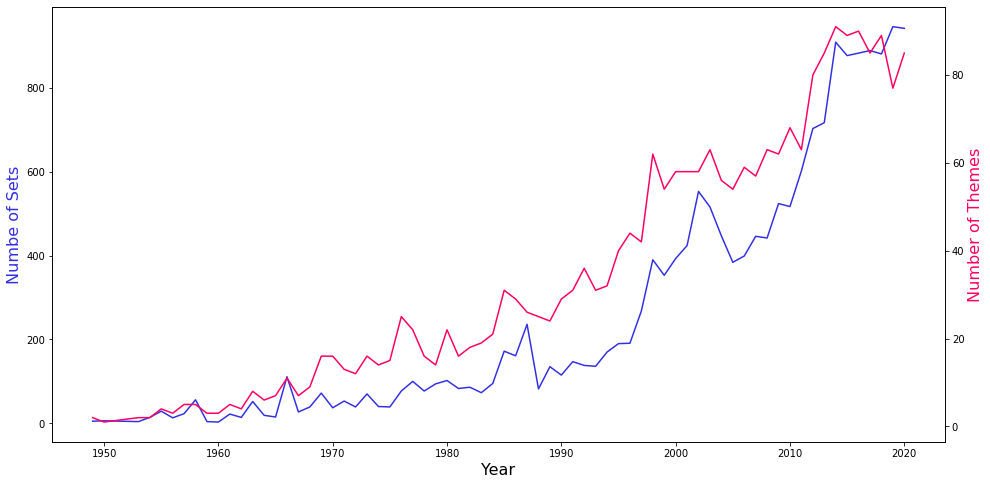

In [113]:
plt.figure(figsize=(16,8))
ax1=plt.gca()
ax2=ax1.twinx()
ax1.plot(sets_by_year.index[:-2],sets_by_year.set_num[:-2],color='#3330E4')
ax2.plot(themes_by_year.index[:-2],themes_by_year.nr_themes[:-2],color='#FF0063')

ax1.set_xlabel('Year',fontsize=16)
ax1.set_ylabel('Numbe of Sets', color='#3330E4',fontsize=16)
ax2.set_ylabel('Number of Themes', color='#FF0063',fontsize=16)

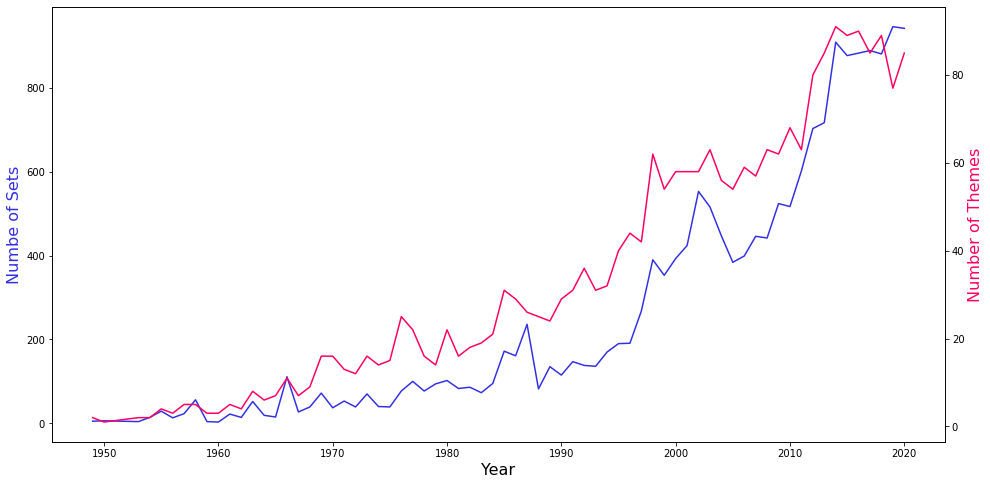

##**Question**: How many mini-figures have been produced so far?

In [114]:
figures = pd.read_csv("Data/minifigs.csv")

In [115]:
figures.tail()

,fig_num,name,num_parts
12370,fig-012888,"Woman, White Torso with Koi, Red Legs, Black Hair",4
12371,fig-012889,"Red Torso with Koi, White Legs, Black Hair",4
12372,fig-012890,Racer - Sudsy Simon,5
12373,fig-012891,"Hermione Granger - Short Black Legs, Black Skirt",5
12374,fig-012892,Sweep,13


**Answer:** Data shows that so far 12374 mini-figures have been produced.


##**Question**: Has the size and complexity of LEGO sets increased over time based on the number of parts? 

In [116]:
parts_per_set = sets.groupby('year').agg({'num_parts':pd.Series.mean})

In [117]:
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,15.758621


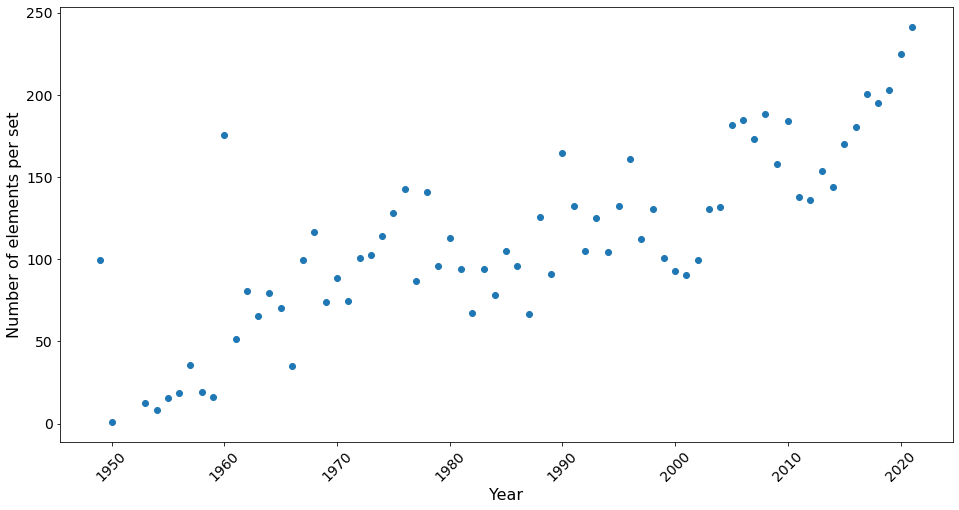

In [118]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of elements per set',fontsize=16)
plt.scatter(parts_per_set.index[:-1], parts_per_set['num_parts'][:-1])

**Answer**: Yes, the complexity of sets increased with time.
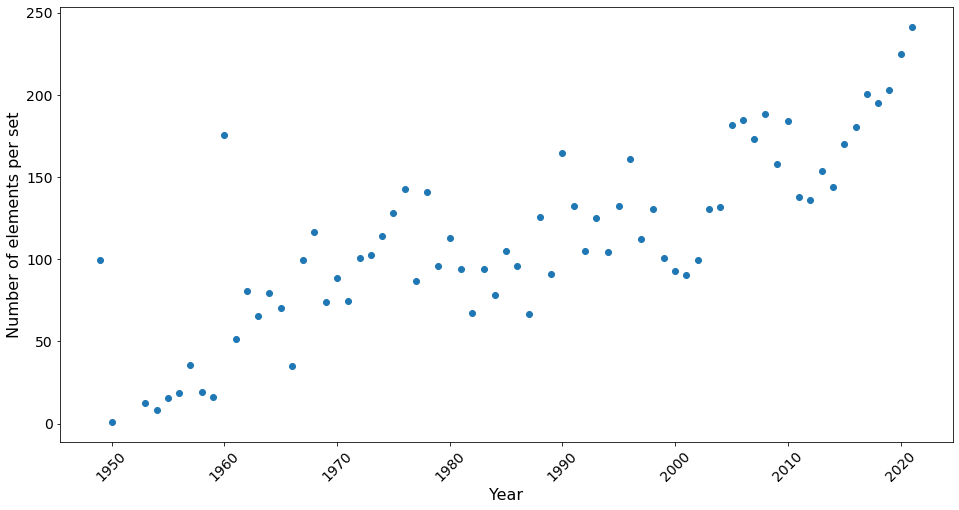

##**Question**: Which themes contains the highest number of sets?

In [134]:
themes = pd.read_csv('Data/themes.csv')

In [135]:
themes.fillna(0,inplace=True)

In [136]:
themes.head()

,id,name,parent_id
0,1,Technic,0.0
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


### Merging (i.e., Combining) DataFrames based on a Key


In [137]:
set_theme_count = sets['theme_id'].value_counts()

In [138]:
set_theme_count= pd.DataFrame({'id':set_theme_count.index,
                                'set_count':set_theme_count.values})

In [139]:
set_theme_count.head()

,id,set_count
0,501,2130
1,158,836
2,503,612
3,497,498
4,494,493


In [145]:
final_data = pd.merge(set_theme_count, themes, on='id')
final_data

,id,set_count,name,parent_id
0,501,2130,Gear,0.0
1,158,836,Star Wars,0.0
2,503,612,Key Chain,501.0
3,497,498,Books,0.0
4,494,493,Friends,0.0
...,...,...,...,...
432,411,1,Legoland,0.0
433,215,1,Pirates,207.0
434,725,1,Series 23 Minifigures,535.0
435,210,1,Belville,207.0


<BarContainer object of 10 artists>

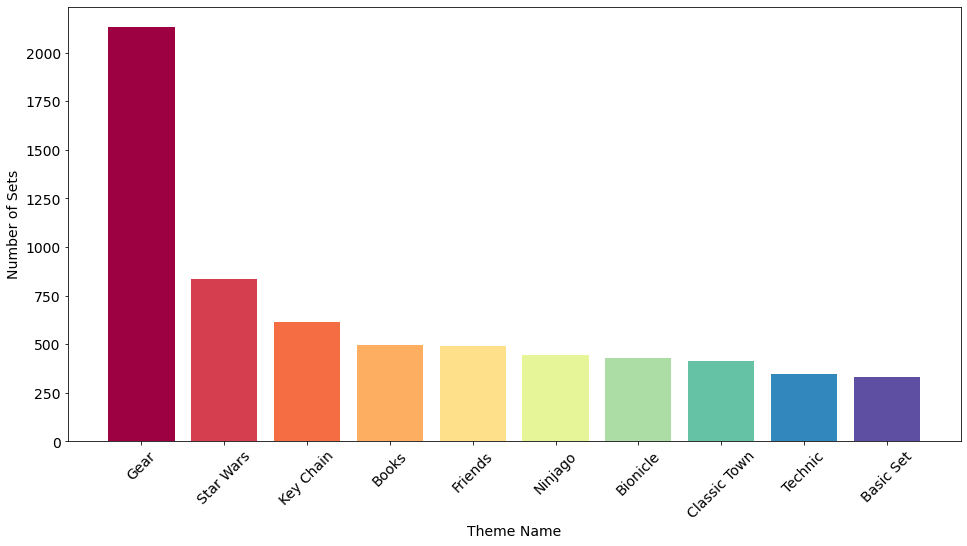

In [144]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Number of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
plt.bar(final_data['name'][:10], final_data['set_count'][:10],color= ["#9e0142","#d53e4f","#f46d43","#fdae61","#fee08b","#e6f598","#abdda4","#66c2a5","#3288bd","#5e4fa2"]

)

**Answer:**
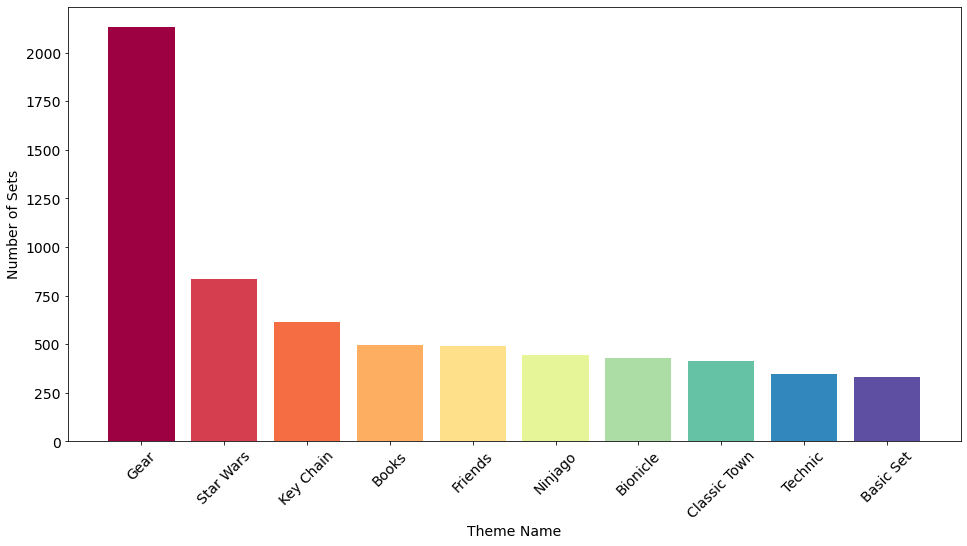